# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 603


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID={weather_api_key}"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"] 

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mukalla
Processing Record 2 of Set 1 | khabary
Processing Record 3 of Set 1 | papatowai
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | kavaratti
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | colonia
Processing Record 8 of Set 1 | grytviken
Processing Record 9 of Set 1 | jamaame
Processing Record 10 of Set 1 | devinuwara
City not found. Skipping...
Processing Record 11 of Set 1 | puerto natales
Processing Record 12 of Set 1 | constantia
Processing Record 13 of Set 1 | kapuskasing
Processing Record 14 of Set 1 | ola
Processing Record 15 of Set 1 | kapa'a
Processing Record 16 of Set 1 | margaret river
Processing Record 17 of Set 1 | qaqortoq
Processing Record 18 of Set 1 | phnom penh
Processing Record 19 of Set 1 | avarua
Processing Record 20 of Set 1 | bredasdorp
Processing Record 21 of Set 1 | stanley
Processing Record 22 of Set 1 | roma
Pr

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       571
Date          571
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mukalla,14.5425,49.1242,24.91,80,86,0.40,YE,1706461622
1,khabary,53.6259,79.5345,-22.60,100,96,1.84,RU,1706461622
2,papatowai,-46.5619,169.4708,12.43,87,90,1.64,NZ,1706461623
3,waitangi,-43.9535,-176.5597,17.68,97,100,4.47,NZ,1706461623
4,kavaratti,10.5669,72.6420,27.53,65,29,1.38,IN,1706461623


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mukalla,14.5425,49.1242,24.91,80,86,0.40,YE,1706461622
1,khabary,53.6259,79.5345,-22.60,100,96,1.84,RU,1706461622
2,papatowai,-46.5619,169.4708,12.43,87,90,1.64,NZ,1706461623
3,waitangi,-43.9535,-176.5597,17.68,97,100,4.47,NZ,1706461623
4,kavaratti,10.5669,72.6420,27.53,65,29,1.38,IN,1706461623


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

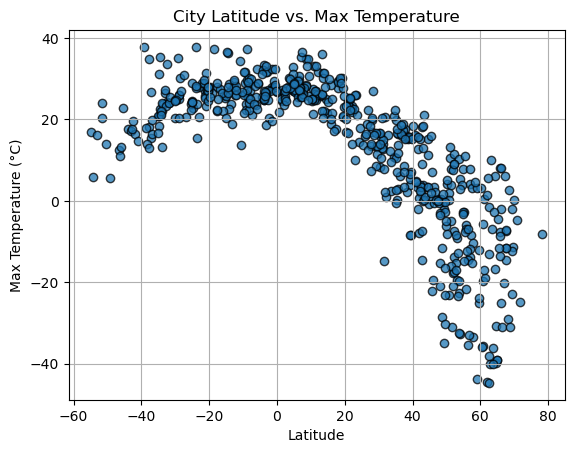

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

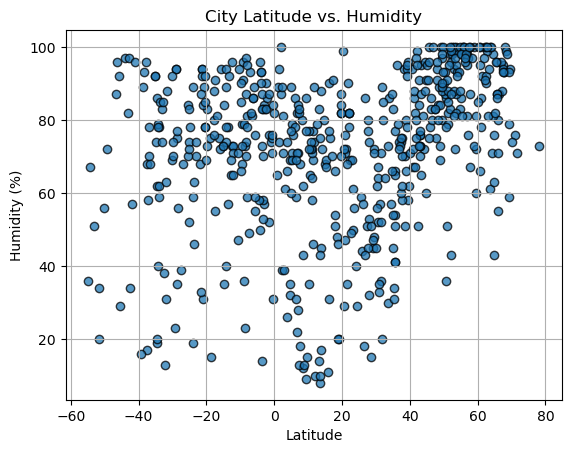

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

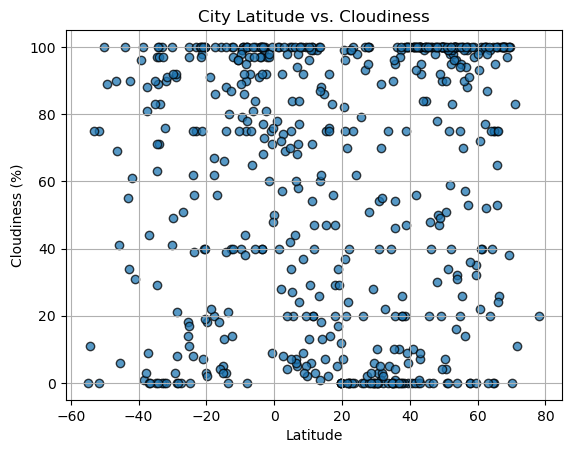

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

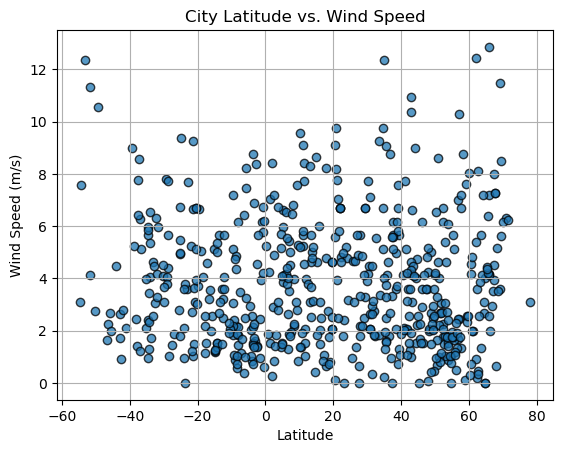

In [24]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [25]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, hemisphere, file_name):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
    
    # Plot & annotation
    plt.scatter(x_values, y_values, alpha=0.75)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=15, color="red")
    plt.annotate(f'R = {round(rvalue, 2)}', (min(x_values), min(y_values) + (max(y_values) - min(y_values)) * 0.9), fontsize=12, color="blue")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)

    # Save the figure
    plt.savefig(f"output_data/{hemisphere}_{file_name}.png")

In [26]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mukalla,14.5425,49.1242,24.91,80,86,0.40,YE,1706461622
1,khabary,53.6259,79.5345,-22.60,100,96,1.84,RU,1706461622
4,kavaratti,10.5669,72.6420,27.53,65,29,1.38,IN,1706461623
6,colonia,50.9333,6.9500,10.46,51,0,4.63,DE,1706461623
8,jamaame,0.0697,42.7450,26.68,82,50,5.23,SO,1706461624


In [27]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,papatowai,-46.5619,169.4708,12.43,87,90,1.64,NZ,1706461623
3,waitangi,-43.9535,-176.5597,17.68,97,100,4.47,NZ,1706461623
5,port-aux-francais,-49.3500,70.2167,5.57,72,89,10.57,TF,1706461623
7,grytviken,-54.2811,-36.5092,5.87,67,11,7.59,GS,1706461624
9,puerto natales,-51.7236,-72.4875,20.25,34,75,11.32,CL,1706461624


###  Temperature vs. Latitude Linear Regression Plot

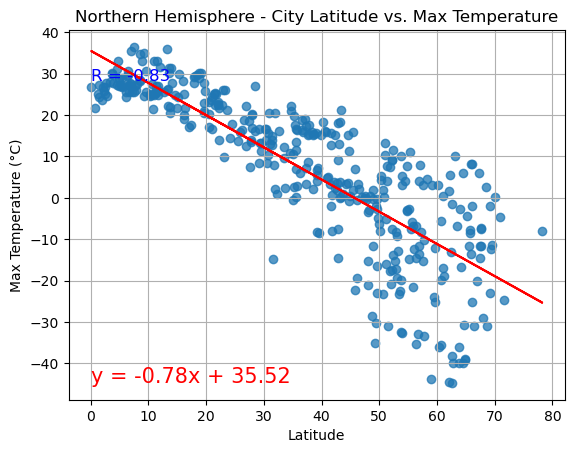

In [28]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"],
                       "Northern Hemisphere - City Latitude vs. Max Temperature",
                       "Latitude", "Max Temperature (°C)", "northern", "Fig1_Northern")

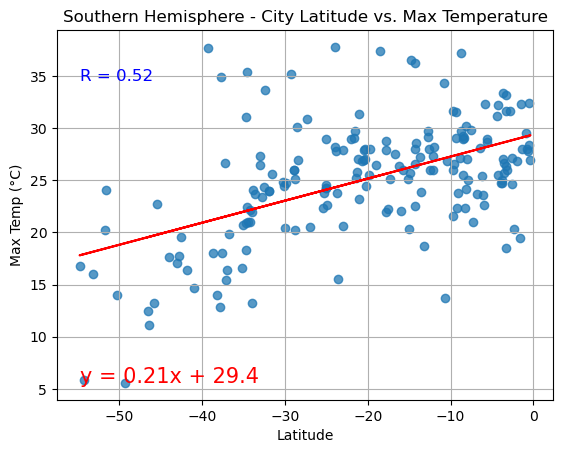

In [33]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"],
                       "Southern Hemisphere - City Latitude vs. Max Temperature",
                       "Latitude", "Max Temp (°C)", "southern", "Fig1_Southern")

**Discussion about the linear relationship:** The closer the latitude is to zero the higher the max temp.

### Humidity vs. Latitude Linear Regression Plot

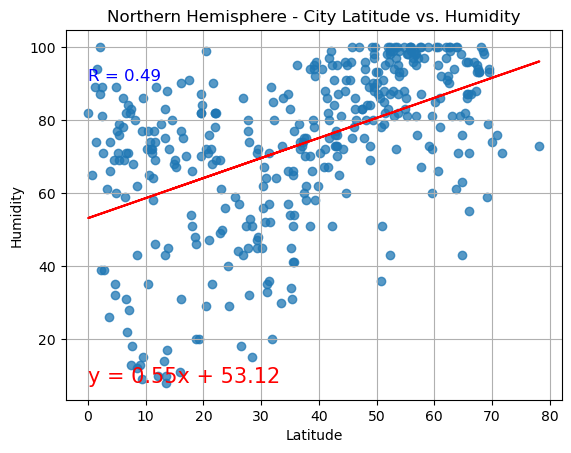

In [32]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"],
                       "Northern Hemisphere - City Latitude vs. Humidity",
                       "Latitude", "Humidity", "northern", "Fig3_Northern")

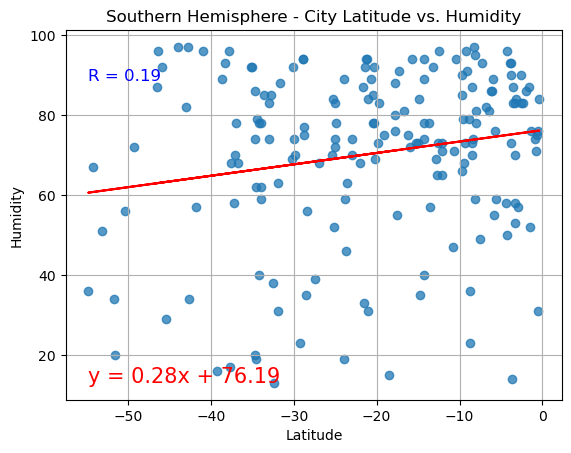

In [34]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"],
                       "Southern Hemisphere - City Latitude vs. Humidity",
                       "Latitude", "Humidity", "southern", "Fig3_Southern")

**Discussion about the linear relationship:** There is no correlation between Humidity & Latitude

### Cloudiness vs. Latitude Linear Regression Plot

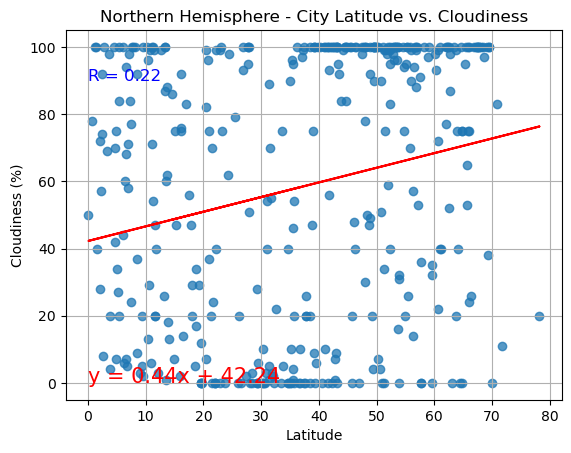

In [35]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"],
                       "Northern Hemisphere - City Latitude vs. Cloudiness",
                       "Latitude", "Cloudiness (%)", "northern", "Fig3_Northern")

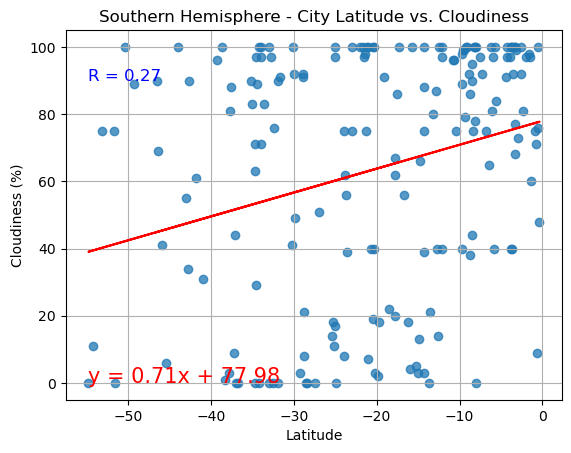

In [36]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"],
                       "Southern Hemisphere - City Latitude vs. Cloudiness",
                       "Latitude", "Cloudiness (%)", "southern", "Fig3_Southern")

**Discussion about the linear relationship:** There is no correlation between Cloudiness & Latitude.

### Wind Speed vs. Latitude Linear Regression Plot

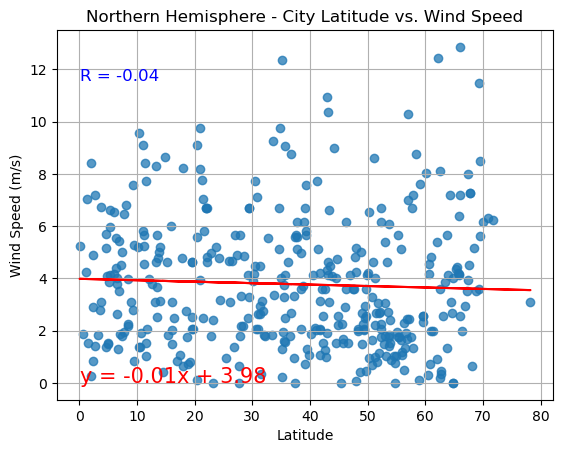

In [37]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"],
                       "Northern Hemisphere - City Latitude vs. Wind Speed",
                       "Latitude", "Wind Speed (m/s)", "northern", "Fig4_Northern")

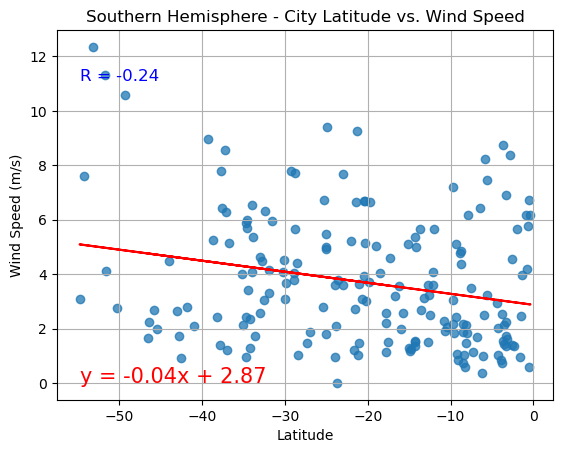

In [38]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"],
                       "Southern Hemisphere - City Latitude vs. Wind Speed",
                       "Latitude", "Wind Speed (m/s)", "southern", "Fig4_Southern")

**Discussion about the linear relationship:** There is no correlation between Wind Speed and Lattitude.